In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras

2022-06-07 08:38:48.019372: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 08:38:48.019392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## data prep

In [2]:
keras.__version__

'2.9.0'

In [3]:
df = pd.read_csv("data/possum.csv").dropna()
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.shape

(101, 14)

In [5]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [6]:
y = df.age.values
y

array([8., 6., 6., 6., 2., 1., 2., 6., 9., 6., 9., 5., 5., 3., 5., 4., 1.,
       2., 5., 4., 3., 3., 4., 2., 3., 7., 2., 4., 3., 2., 3., 4., 3., 2.,
       4., 7., 2., 7., 1., 3., 3., 2., 3., 2., 5., 4., 5., 5., 6., 3., 7.,
       2., 3., 4., 3., 2., 2., 7., 3., 6., 3., 5., 3., 4., 5., 5., 7., 6.,
       1., 1., 4., 6., 5., 6., 1., 1., 1., 3., 4., 3., 3., 3., 3., 2., 2.,
       6., 3., 3., 2., 3., 7., 4., 4., 3., 5., 3., 1., 1., 6., 4., 3.])

In [7]:
sex = (df.sex.values == "f") + 0.
sex = sex.reshape(-1, 1)

In [8]:
x = np.hstack((df.iloc[:, 5:].values, sex))
x

array([[94.1, 60.4, 89. , ..., 28. , 36. ,  0. ],
       [92.5, 57.6, 91.5, ..., 28.5, 33. ,  1. ],
       [94. , 60. , 95.5, ..., 30. , 34. ,  1. ],
       ...,
       [92.4, 55. , 89. , ..., 25. , 30. ,  1. ],
       [91.5, 55.2, 82.5, ..., 25. , 29. ,  0. ],
       [93.6, 59.9, 89. , ..., 28.5, 33.5,  1. ]])

In [9]:
# take mean to standardize vector
mu = x.mean(axis=0)
print('mu', mu)
sigma = x.std(axis=0)
print('sigma', sigma)

mu [92.73069307 56.96039604 87.26930693 37.04950495 68.3980198  48.13366337
 15.05049505 27.06435644 32.63861386  0.41584158]
sigma [3.50125133 3.08728081 4.17597425 1.96189562 4.39159819 4.04020089
 1.05338904 2.0106934  2.71420795 0.49286647]


In [10]:
x = (x-mu)/sigma
x

array([[ 0.39109073,  1.11412086,  0.41444055, ...,  0.46533378,
         1.2384409 , -0.84372057],
       [-0.06588875,  0.20717389,  1.01310325, ...,  0.71400422,
         0.13314608,  1.18522652],
       [ 0.36252951,  0.98455701,  1.97096356, ...,  1.46001552,
         0.50157768,  1.18522652],
       ...,
       [-0.09444997, -0.63499116,  0.41444055, ..., -1.02668882,
        -0.97214875,  1.18522652],
       [-0.35150092, -0.57020924, -1.14208246, ..., -1.02668882,
        -1.34058036, -0.84372057],
       [ 0.24828464,  0.95216604,  0.41444055, ...,  0.71400422,
         0.31736188,  1.18522652]])

In [11]:
x.shape, x.dtype

((101, 10), dtype('float64'))

In [12]:
y.shape, y.dtype

((101,), dtype('float64'))

## Deep learning

In [13]:
# create model
neural = keras.models.Sequential()

# add input layer
neural.add(keras.layers.InputLayer(input_shape=(10,), name='Input'))  # use 10, to add as tuple, we have 10 samples

# add hidden layer
neural.add(keras.layers.Dense(units=64, activation='relu', name='Hidden_1'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='Hidden_2'))

# normally linear, but relu doesn't predict negative values, thus possible
neural.add(keras.layers.Dense(units=1, activation='linear', name='Output'))
# neural.add(keras.layers.Activation(activation=keras.activation.linear))

2022-06-07 08:38:52.671281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-07 08:38:52.671301: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-07 08:38:52.671317: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nuc417.bin.bioinf.nl): /proc/driver/nvidia/version does not exist
2022-06-07 08:38:52.671498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
neural.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD())
neural.fit(
    x=x,
    y=y,
    epochs=100)
# verbose=0

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 16.3573
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 8.0144
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 4.6992
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 4.0661
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 3.8492
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 3.3475
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 3.1967
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 2.9488
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 2.8463
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 3.0319
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 2.9069
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 2.5169
Epoch 13/100
4/4 [==============================] - 0s 1ms/s

In [15]:
neural.evaluate(x, y)

4/4 [==============================] - 0s 1ms/step - loss: 0.7556


0.7555572390556335

In [16]:
import matplotlib.pyplot as plt

In [17]:
yhat = neural.predict(x)

4/4 [==============================] - 0s 1ms/step


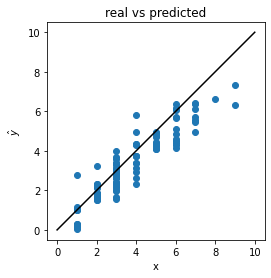

In [18]:
plt.scatter(y, yhat)
plt.plot([0, 10], [0, 10], '-k')
plt.title('real vs predicted')
plt.ylabel('$\hat{y}$')
plt.xlabel('x')
plt.axis('square')
plt.show()

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
print(f'R2: {r2_score(y, yhat):.3} years')
print(f'MAE: {mean_absolute_error(y, yhat):.3} years')
print(f'RMSE: {mean_squared_error(y, yhat):.3} years')

R2: 0.792 years
MAE: 0.676 years
RMSE: 0.756 years


# Machine Learning (numpy)

In [27]:
design_matrix = np.hstack((np.ones((101, 1)), x))
coef = np.linalg.solve(design_matrix.T@design_matrix, design_matrix.T@y)
yhat = design_matrix @ coef
yhat

array([4.47556503, 4.39063686, 4.5600785 , 3.98820729, 4.35467852,
       4.07538781, 4.37880811, 4.57853344, 4.38980819, 4.02147278,
       4.11125476, 4.29692558, 3.93010996, 3.80384478, 4.54260121,
       3.24994919, 4.34544963, 3.97439761, 4.17867029, 4.5394946 ,
       4.93370964, 4.75931173, 4.5414402 , 3.73206556, 4.70513833,
       5.19556533, 2.36991507, 3.39452414, 2.81024713, 3.39864138,
       3.75739969, 4.11220801, 2.80023803, 2.58513638, 5.11872818,
       3.72323915, 3.31021744, 3.58641014, 1.79368547, 2.87000462,
       3.4324904 , 3.01312736, 3.4152756 , 3.23454294, 5.04824163,
       4.50610486, 4.74990746, 5.8787146 , 4.25769994, 4.35544787,
       5.29316816, 5.13484477, 4.45764202, 5.40905634, 4.4337871 ,
       4.74850168, 3.72122378, 3.88911744, 3.77800652, 3.49624204,
       4.97665268, 4.24505241, 4.26851766, 3.76923779, 3.83383298,
       4.51205282, 3.47397407, 3.76395128, 2.35494878, 1.94394391,
       4.05218179, 4.28993072, 4.63040362, 4.15381168, 1.57849

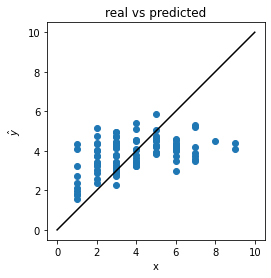

In [28]:
plt.scatter(y, yhat)
plt.plot([0, 10], [0, 10], '-k')
plt.title('real vs predicted')
plt.ylabel('$\hat{y}$')
plt.xlabel('x')
plt.axis('square')
plt.show()